MARKET BASKET ANALYSIS FOR GROCERY STORE DATA

STEP 1: DATA LOADING AND EXPLORATION
Dataset loaded successfully: 9834 rows x 32 columns
Column names: ['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31']
Data types: {'citrus fruit': dtype('O'), 'semi-finished bread': dtype('O'), 'margarine': dtype('O'), 'ready soups': dtype('O'), 'Unnamed: 4': dtype('O'), 'Unnamed: 5': dtype('O'), 'Unnamed: 6': dtype('O'), 'Unnamed: 7': dtype('O'), 'Unnamed: 8': dtype('O'), 'Unnamed: 9': dtype('O'), 'Unnamed: 10': dtype('O'), 'Unnamed: 11': dtype('O'), 'Unnamed: 12': dtype('O'), 'Un

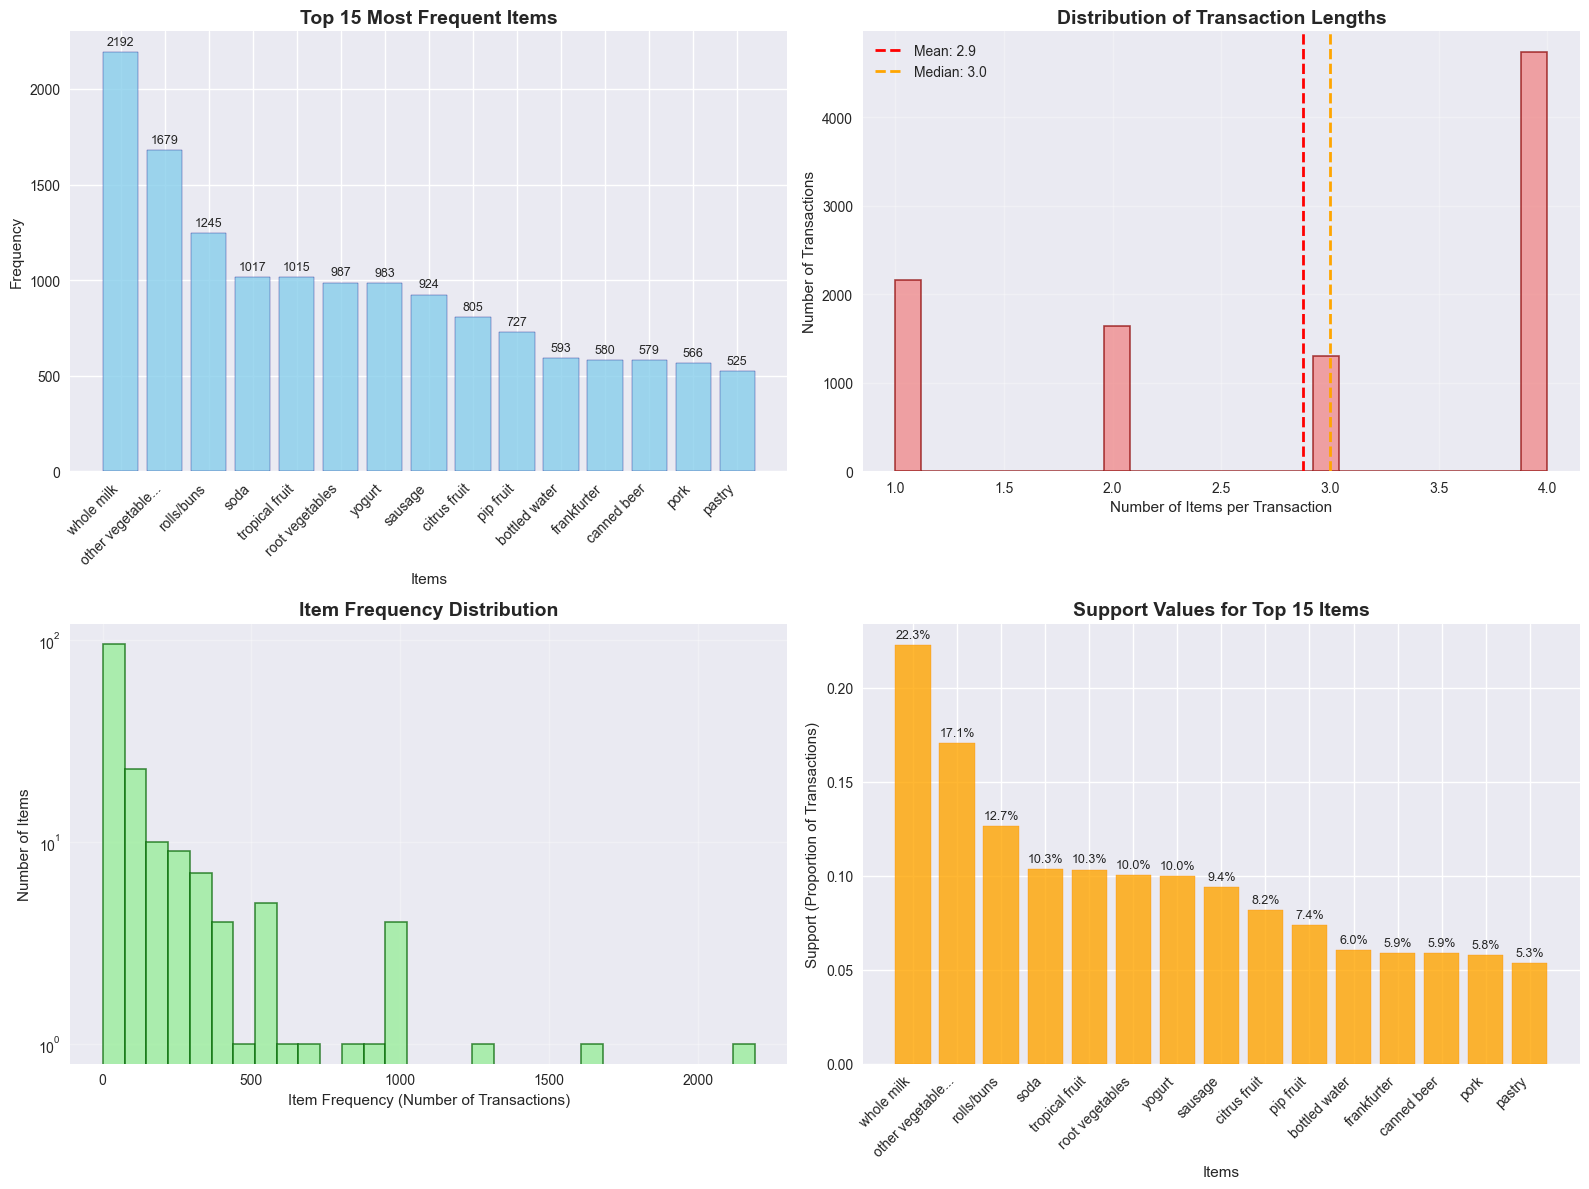

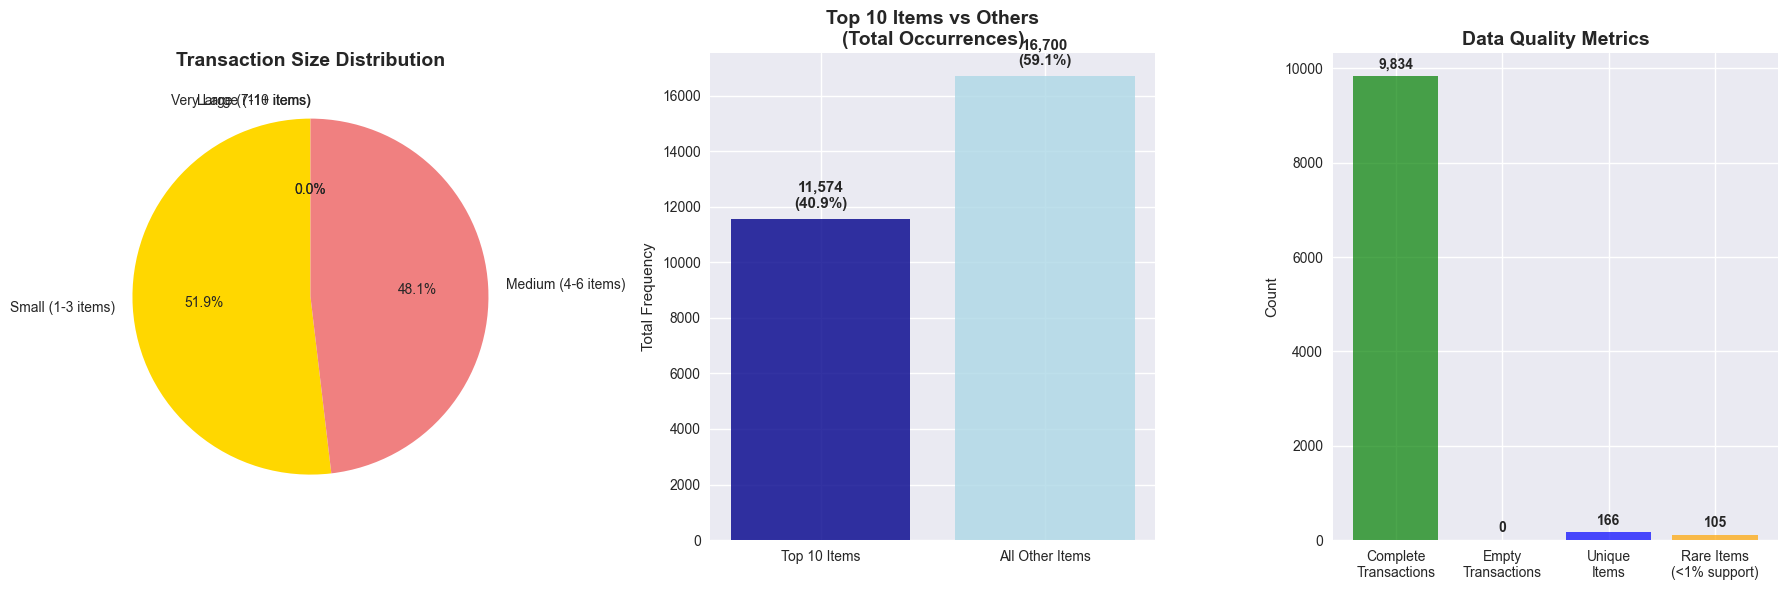


STEP 3: FINDING FREQUENT ITEMSETS
Running Apriori algorithm with minimum support: 0.020
Minimum transactions required: 196
Found 47 frequent itemsets with support >= 0.020
Frequent itemsets by length:
  1-itemsets: 40
  2-itemsets: 7
Top 15 frequent itemsets:
  whole milk (Support: 0.223, 2192 transactions)
  other vegetables (Support: 0.171, 1679 transactions)
  rolls/buns (Support: 0.127, 1245 transactions)
  soda (Support: 0.103, 1017 transactions)
  tropical fruit (Support: 0.103, 1014 transactions)
  root vegetables (Support: 0.100, 987 transactions)
  yogurt (Support: 0.100, 983 transactions)
  sausage (Support: 0.094, 924 transactions)
  citrus fruit (Support: 0.082, 805 transactions)
  pip fruit (Support: 0.074, 726 transactions)
  bottled water (Support: 0.060, 593 transactions)
  frankfurter (Support: 0.059, 580 transactions)
  canned beer (Support: 0.059, 579 transactions)
  pork (Support: 0.058, 566 transactions)
  pastry (Support: 0.053, 525 transactions)

STEP 4: GENERAT

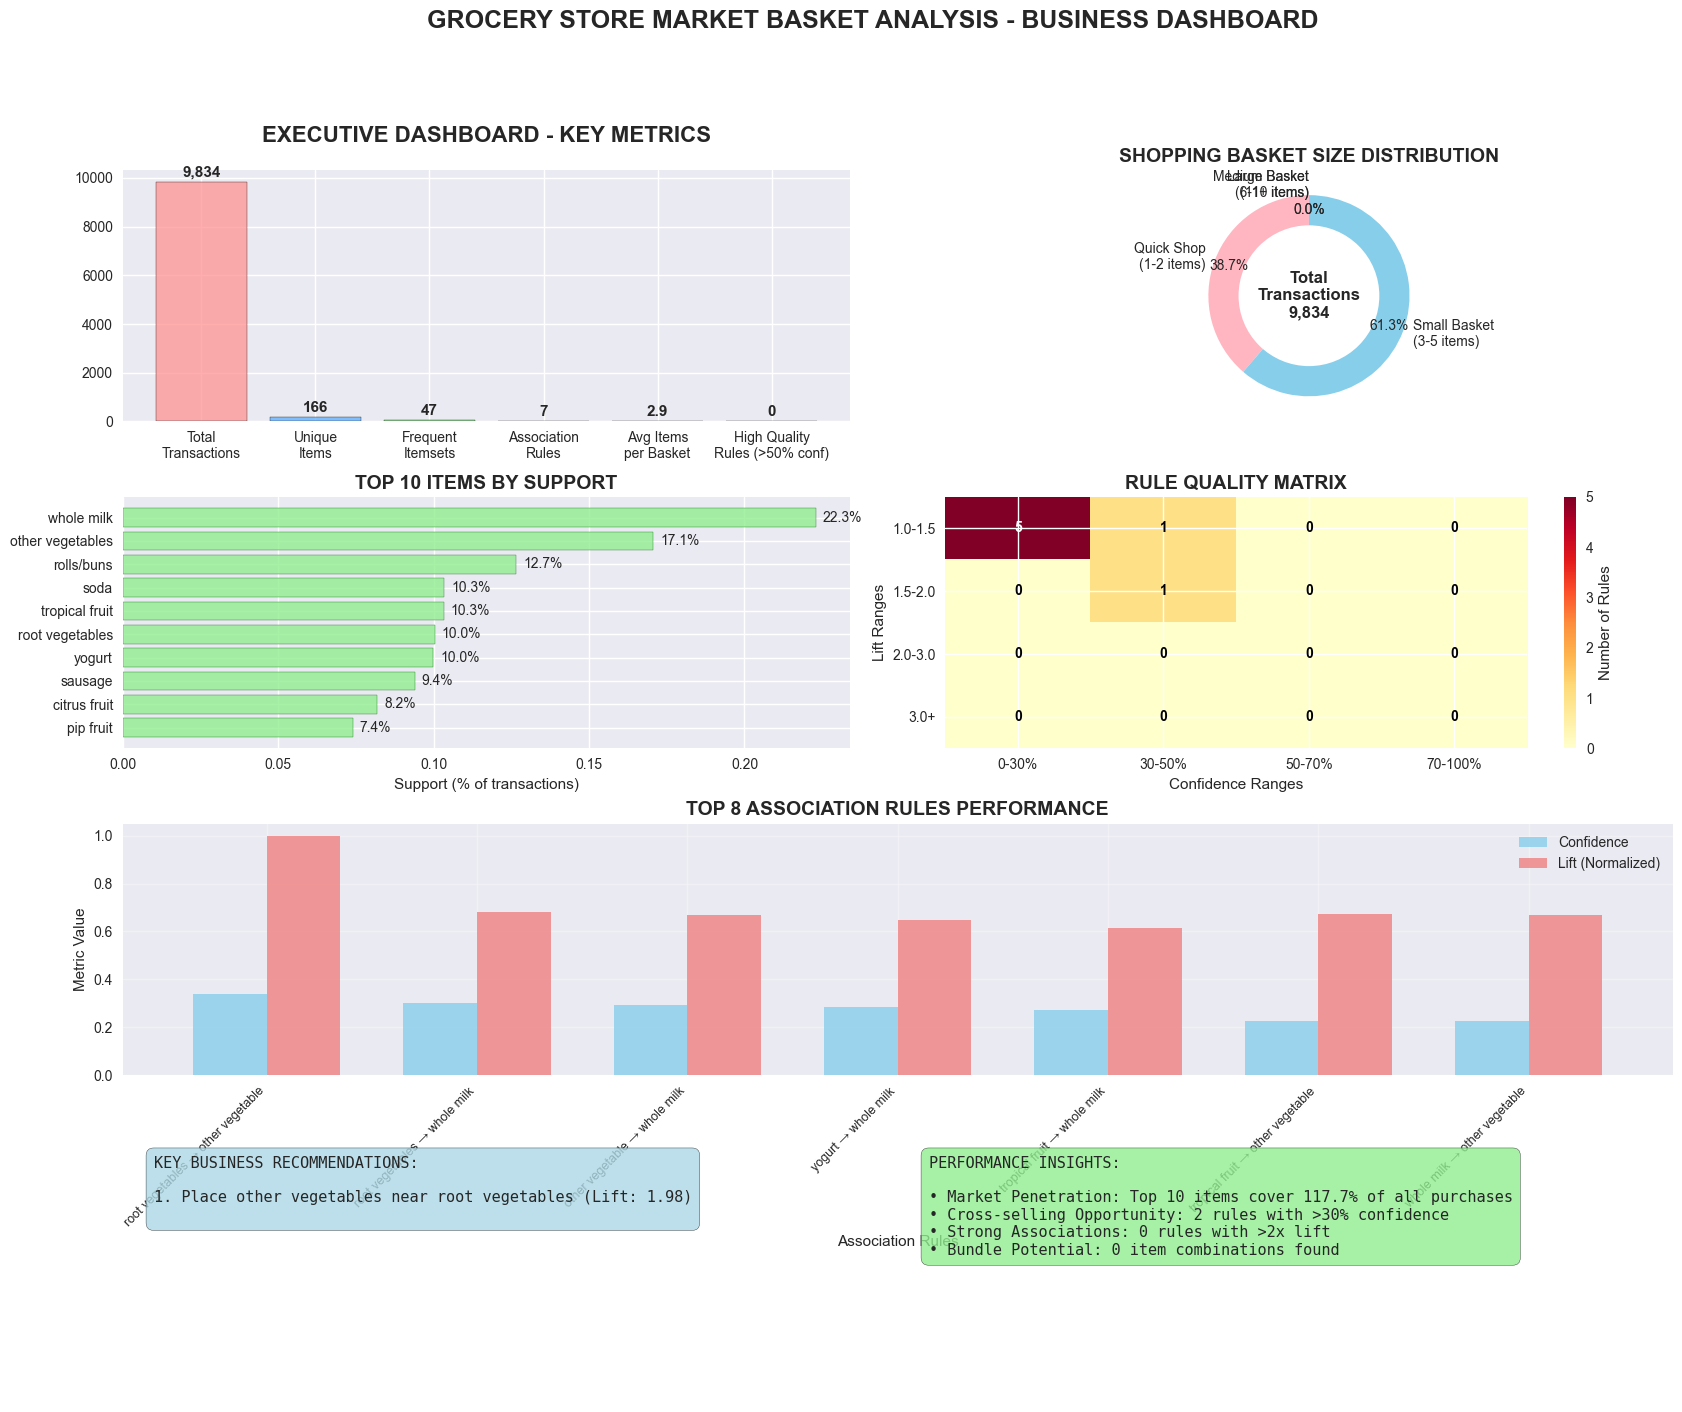

Comprehensive business dashboard created and displayed!
Dashboard saved to: outputs/figures/comprehensive_business_dashboard.png
Error during analysis: name 'item_counts' is not defined


NameError: name 'item_counts' is not defined

In [ ]:
"""
Market Basket Analysis using Association Rules
Course: MSDA9223 - Data Mining and Information Retrieval
Author: Emmanuel Irumva - 100917
Date: June 29, 2025

This script performs complete market basket analysis on grocery store data:
1. Data Loading and Exploration
2. Data Preprocessing and Transformation  
3. Finding Frequent Itemsets using Apriori Algorithm
4. Generating Association Rules
5. Business Insights and Recommendations
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
import os
warnings.filterwarnings('ignore')

# Configuration
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Create output directories
os.makedirs('outputs/figures', exist_ok=True)
os.makedirs('outputs/results', exist_ok=True)

# Dataset configuration
FILE_PATH = "/Users/MAcookPro2017/Desktop/AUCA/Data-Mining/Quiz/groceries.csv"

class MarketBasketAnalyzer:
    """Complete Market Basket Analysis Implementation"""
    
    def __init__(self, file_path):
        self.file_path = file_path
        self.df_raw = None
        self.transactions = None
        self.df_encoded = None
        self.frequent_itemsets = None
        self.association_rules_df = None
        self.total_transactions = 0
        
    def load_and_explore_data(self):
        """Step 1: Load and explore the dataset"""
        print("STEP 1: DATA LOADING AND EXPLORATION")
        print("=" * 60)
        
        try:
            self.df_raw = pd.read_csv(self.file_path)
            print(f"Dataset loaded successfully: {self.df_raw.shape[0]} rows x {self.df_raw.shape[1]} columns")
        except UnicodeDecodeError:
            self.df_raw = pd.read_csv(self.file_path, encoding='latin-1')
            print(f"Dataset loaded with latin-1 encoding: {self.df_raw.shape[0]} rows x {self.df_raw.shape[1]} columns")
        except FileNotFoundError:
            raise FileNotFoundError(f"Dataset not found at: {self.file_path}")
        
        print(f"Column names: {list(self.df_raw.columns)}")
        print(f"Data types: {dict(self.df_raw.dtypes)}")
        
        # Basic data quality checks
        missing_data = self.df_raw.isnull().sum().sum()
        total_cells = self.df_raw.shape[0] * self.df_raw.shape[1]
        completeness = ((total_cells - missing_data) / total_cells) * 100
        
        print(f"Data completeness: {completeness:.1f}%")
        print(f"Missing values: {missing_data}")
        print(f"Duplicate rows: {self.df_raw.duplicated().sum()}")
        
        print("Sample data:")
        print(self.df_raw.head())
        print()
        
    def preprocess_data(self):
        """Step 2: Preprocess and transform data"""
        print("STEP 2: DATA PREPROCESSING AND TRANSFORMATION")
        print("=" * 60)
        
        data_format = self._detect_data_format()
        print(f"Detected data format: {data_format}")
        
        self.transactions = self._process_transactions(data_format)
        self.total_transactions = len(self.transactions)
        
        if self.total_transactions == 0:
            raise ValueError("No valid transactions found in the dataset")
        
        # Create binary matrix using TransactionEncoder
        te = TransactionEncoder()
        te_ary = te.fit(self.transactions).transform(self.transactions)
        self.df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
        
        # Calculate transaction statistics
        transaction_lengths = [len(t) for t in self.transactions]
        
        print(f"Processed {self.total_transactions} transactions")
        print(f"Unique items: {self.df_encoded.shape[1]}")
        print(f"Average items per transaction: {np.mean(transaction_lengths):.2f}")
        print(f"Min/Max items per transaction: {min(transaction_lengths)}/{max(transaction_lengths)}")
        
        # Item frequency analysis
        all_items = [item for transaction in self.transactions for item in transaction]
        item_counts = Counter(all_items)
        
        print(f"Total item occurrences: {len(all_items)}")
        print(f"Top 10 most frequent items:")
        for item, count in item_counts.most_common(10):
            percentage = (count / self.total_transactions) * 100
            print(f"  {item}: {count} transactions ({percentage:.1f}%)")
        
        # Save processed data
        self._save_processed_data(item_counts, transaction_lengths)
        
        # Create data exploration visualization
        self._create_data_exploration_plots(item_counts, transaction_lengths)
        print()
        
    def find_frequent_itemsets(self, min_support=0.02):
        """Step 3: Find frequent itemsets using Apriori algorithm"""
        print("STEP 3: FINDING FREQUENT ITEMSETS")
        print("=" * 60)
        
        print(f"Running Apriori algorithm with minimum support: {min_support:.3f}")
        print(f"Minimum transactions required: {int(min_support * self.total_transactions)}")
        
        # Try different support thresholds if initial one fails
        support_thresholds = [min_support, 0.015, 0.01, 0.005]
        
        for support in support_thresholds:
            try:
                self.frequent_itemsets = apriori(self.df_encoded, 
                                               min_support=support, 
                                               max_len=5,
                                               use_colnames=True)
                
                if len(self.frequent_itemsets) > 0:
                    print(f"Found {len(self.frequent_itemsets)} frequent itemsets with support >= {support:.3f}")
                    break
                else:
                    print(f"No itemsets found with support >= {support:.3f}")
                    
            except Exception as e:
                print(f"Error with support {support:.3f}: {e}")
                continue
        
        if self.frequent_itemsets is None or len(self.frequent_itemsets) == 0:
            raise ValueError("Could not find any frequent itemsets. Data may be too sparse.")
        
        # Add itemset length column
        self.frequent_itemsets['length'] = self.frequent_itemsets['itemsets'].apply(len)
        self.frequent_itemsets = self.frequent_itemsets.sort_values('support', ascending=False).reset_index(drop=True)
        
        # Analyze itemsets by length
        length_counts = self.frequent_itemsets['length'].value_counts().sort_index()
        print("Frequent itemsets by length:")
        for length, count in length_counts.items():
            print(f"  {length}-itemsets: {count}")
        
        # Show top itemsets
        print("Top 15 frequent itemsets:")
        for idx, row in self.frequent_itemsets.head(15).iterrows():
            itemset = list(row['itemsets'])
            support = row['support']
            trans_count = int(support * self.total_transactions)
            
            if len(itemset) == 1:
                print(f"  {itemset[0]} (Support: {support:.3f}, {trans_count} transactions)")
            else:
                itemset_str = " + ".join(itemset)
                print(f"  {{{itemset_str}}} (Support: {support:.3f}, {trans_count} transactions)")
        
        # Save and visualize frequent itemsets
        self._save_frequent_itemsets()
        self._create_frequent_itemsets_plots()
        print()
        
    def generate_association_rules(self, min_confidence=0.2, min_lift=1.1):
        """Step 4: Generate association rules"""
        print("STEP 4: GENERATING ASSOCIATION RULES")
        print("=" * 60)
        
        print(f"Generating rules with confidence >= {min_confidence:.2f} and lift >= {min_lift:.1f}")
        
        # Try different confidence thresholds
        confidence_thresholds = [min_confidence, 0.15, 0.1, 0.05]
        
        for confidence in confidence_thresholds:
            try:
                rules = association_rules(self.frequent_itemsets, 
                                        metric='confidence', 
                                        min_threshold=confidence)
                
                if len(rules) > 0:
                    # Filter by lift
                    rules = rules[rules['lift'] >= min_lift]
                    
                    if len(rules) > 0:
                        self.association_rules_df = rules.sort_values('confidence', ascending=False).reset_index(drop=True)
                        print(f"Generated {len(rules)} association rules")
                        break
                    else:
                        print(f"No rules found with lift >= {min_lift:.1f}")
                else:
                    print(f"No rules found with confidence >= {confidence:.2f}")
                    
            except Exception as e:
                print(f"Error with confidence {confidence:.2f}: {e}")
                continue
        
        if self.association_rules_df is None or len(self.association_rules_df) == 0:
            raise ValueError("Could not generate any association rules")
        
        # Add rule length information
        self.association_rules_df['antecedent_len'] = self.association_rules_df['antecedents'].apply(len)
        self.association_rules_df['consequent_len'] = self.association_rules_df['consequents'].apply(len)
        
        # Analyze rules
        print(f"Average confidence: {self.association_rules_df['confidence'].mean():.3f}")
        print(f"Average lift: {self.association_rules_df['lift'].mean():.3f}")
        print(f"Rules with confidence > 50%: {len(self.association_rules_df[self.association_rules_df['confidence'] > 0.5])}")
        print(f"Rules with lift > 2.0: {len(self.association_rules_df[self.association_rules_df['lift'] > 2.0])}")
        
        # Show top rules
        print("Top 10 association rules:")
        for idx, rule in self.association_rules_df.head(10).iterrows():
            antecedents = ", ".join(list(rule['antecedents']))
            consequents = ", ".join(list(rule['consequents']))
            confidence = rule['confidence']
            lift = rule['lift']
            support = rule['support']
            
            print(f"  {antecedents} → {consequents}")
            print(f"    Confidence: {confidence:.3f}, Lift: {lift:.3f}, Support: {support:.3f}")
        
        # Save and visualize association rules
        self._save_association_rules()
        self._create_association_rules_plots()
        print()
        
    def generate_business_insights(self):
        """Step 5: Generate business insights and recommendations"""
        print("STEP 5: BUSINESS INSIGHTS AND RECOMMENDATIONS")
        print("=" * 60)
        
        insights = {
            'high_confidence_rules': [],
            'high_lift_rules': [],
            'popular_items': [],
            'item_pairs': [],
            'recommendations': []
        }
        
        # High confidence rules (reliable predictions)
        high_conf_rules = self.association_rules_df[self.association_rules_df['confidence'] >= 0.5].head(5)
        for _, rule in high_conf_rules.iterrows():
            antecedents = ", ".join(list(rule['antecedents']))
            consequents = ", ".join(list(rule['consequents']))
            confidence = rule['confidence']
            insights['high_confidence_rules'].append({
                'rule': f"{antecedents} → {consequents}",
                'confidence': confidence,
                'interpretation': f"When customers buy {antecedents}, they also buy {consequents} {confidence:.1%} of the time"
            })
        
        # High lift rules (strong associations)
        high_lift_rules = self.association_rules_df[self.association_rules_df['lift'] >= 2.0].head(5)
        for _, rule in high_lift_rules.iterrows():
            antecedents = ", ".join(list(rule['antecedents']))
            consequents = ", ".join(list(rule['consequents']))
            lift = rule['lift']
            insights['high_lift_rules'].append({
                'rule': f"{antecedents} → {consequents}",
                'lift': lift,
                'interpretation': f"{consequents} is {lift:.1f}x more likely to be purchased when {antecedents} is in the basket"
            })
        
        # Most popular individual items
        single_items = self.frequent_itemsets[self.frequent_itemsets['length'] == 1].head(10)
        for _, item_row in single_items.iterrows():
            item = list(item_row['itemsets'])[0]
            support = item_row['support']
            insights['popular_items'].append({
                'item': item,
                'support': support,
                'frequency': f"Appears in {support:.1%} of all transactions"
            })
        
        # Most popular item pairs
        if 2 in self.frequent_itemsets['length'].values:
            pairs = self.frequent_itemsets[self.frequent_itemsets['length'] == 2].head(5)
            for _, pair_row in pairs.iterrows():
                items = list(pair_row['itemsets'])
                support = pair_row['support']
                insights['item_pairs'].append({
                    'pair': f"{items[0]} + {items[1]}",
                    'support': support,
                    'frequency': f"Bought together in {support:.1%} of transactions"
                })
        
        # Generate business recommendations
        insights['recommendations'] = self._generate_recommendations()
        
        # Print insights
        self._print_business_insights(insights)
        
        # Save insights to file
        self._save_business_insights(insights)
        
        return insights
        
    def run_complete_analysis(self):
        """Run the complete market basket analysis pipeline"""
        print("MARKET BASKET ANALYSIS FOR GROCERY STORE DATA")
        print("=" * 80)
        print()
        
        try:
            self.load_and_explore_data()
            self.preprocess_data()
            self.find_frequent_itemsets()
            self.generate_association_rules()
            insights = self.generate_business_insights()
            
            print("ANALYSIS COMPLETED SUCCESSFULLY")
            print("=" * 80)
            print("Output files created:")
            print("- outputs/results/processed_transactions.csv")
            print("- outputs/results/frequent_itemsets.csv")
            print("- outputs/results/association_rules.csv")
            print("- outputs/results/business_insights.txt")
            print("- outputs/figures/data_exploration.png")
            print("- outputs/figures/frequent_itemsets_analysis.png")
            print("- outputs/figures/association_rules_analysis.png")
            
            return insights
            
        except Exception as e:
            print(f"Error during analysis: {e}")
            raise
    
    # Helper methods
    def _detect_data_format(self):
        """Detect the format of the input data"""
        if self.df_raw.shape[1] == 1:
            sample_value = str(self.df_raw.iloc[0, 0])
            if ',' in sample_value:
                return "comma_separated"
            else:
                return "single_item_per_row"
        elif self.df_raw.shape[1] > 2:
            # Check if it's one-hot encoded (binary values)
            numeric_cols = self.df_raw.select_dtypes(include=[np.number]).columns
            if len(numeric_cols) > 0:
                unique_vals = set()
                for col in numeric_cols[:5]:
                    unique_vals.update(self.df_raw[col].dropna().unique())
                if unique_vals.issubset({0, 1, 0.0, 1.0}):
                    return "one_hot_encoded"
            
            # Check if it's multi-column transaction format
            # Look for grocery item names in the first few columns
            sample_values = []
            for col in self.df_raw.columns[:5]:
                if not col.startswith('Unnamed'):
                    sample_values.extend(self.df_raw[col].dropna().astype(str).head(10).tolist())
            
            # If we find text values that look like grocery items, it's multi-column format
            grocery_indicators = ['fruit', 'milk', 'bread', 'meat', 'vegetable', 'cheese', 'butter', 
                                'coffee', 'tea', 'juice', 'yogurt', 'cream', 'rice', 'pasta']
            
            text_content = ' '.join(sample_values).lower()
            if any(indicator in text_content for indicator in grocery_indicators):
                return "multi_column"
            
            return "multi_column"  # Default for wide format
        elif self.df_raw.shape[1] == 2:
            return "transaction_item_pairs"
        return "unknown"
    
    def _process_transactions(self, data_format):
        """Process data based on detected format"""
        transactions = []
        
        if data_format == "comma_separated":
            for idx, row in self.df_raw.iterrows():
                items_str = str(row.iloc[0])
                if pd.notna(items_str) and items_str.lower() != 'nan':
                    items = [item.strip() for item in items_str.split(',')]
                    items = [item for item in items if item and item.lower() != 'nan']
                    if items:
                        transactions.append(items)
        
        elif data_format == "one_hot_encoded":
            for idx, row in self.df_raw.iterrows():
                transaction = []
                for col in self.df_raw.columns:
                    if row[col] == 1 or row[col] == 1.0:
                        transaction.append(col)
                if transaction:
                    transactions.append(transaction)
        
        elif data_format == "multi_column":
            # Handle multi-column format where each row is a transaction
            # and each column contains an item (with NaN for missing items)
            for idx, row in self.df_raw.iterrows():
                transaction = []
                for col in self.df_raw.columns:
                    item = str(row[col]).strip()
                    # Include non-null values that are not 'nan' and not empty
                    if (pd.notna(row[col]) and 
                        item.lower() != 'nan' and 
                        item != '' and 
                        not col.startswith('Unnamed')):  # Skip unnamed columns
                        transaction.append(item)
                
                # Only add transactions with at least one item
                if transaction:
                    transactions.append(transaction)
        
        elif data_format == "transaction_item_pairs":
            transaction_col = self.df_raw.columns[0]
            item_col = self.df_raw.columns[1]
            transactions_dict = {}
            
            for idx, row in self.df_raw.iterrows():
                trans_id = row[transaction_col]
                item = str(row[item_col]).strip()
                
                if pd.notna(item) and item and item.lower() != 'nan':
                    if trans_id not in transactions_dict:
                        transactions_dict[trans_id] = []
                    transactions_dict[trans_id].append(item)
            
            transactions = list(transactions_dict.values())
        
        else:
            # Generic fallback for unknown formats
            # Try to extract all non-null, non-empty values from each row
            for idx, row in self.df_raw.iterrows():
                transaction = []
                for col in self.df_raw.columns:
                    item = str(row[col]).strip()
                    if (pd.notna(row[col]) and 
                        item.lower() != 'nan' and 
                        item != '' and 
                        item != 'None'):
                        transaction.append(item)
                
                if transaction:
                    transactions.append(transaction)
        
        return transactions
    
    def _save_processed_data(self, item_counts, transaction_lengths):
        """Save processed transaction data"""
        # Transaction data
        transactions_df = pd.DataFrame({
            'Transaction_ID': range(1, len(self.transactions) + 1),
            'Items': [', '.join(transaction) for transaction in self.transactions],
            'Item_Count': [len(transaction) for transaction in self.transactions]
        })
        transactions_df.to_csv('outputs/results/processed_transactions.csv', index=False)
        
        # Item frequency data
        item_freq_df = pd.DataFrame(item_counts.most_common(), columns=['Item', 'Frequency'])
        item_freq_df['Support'] = item_freq_df['Frequency'] / self.total_transactions
        item_freq_df.to_csv('outputs/results/item_frequency.csv', index=False)
    
    def _save_frequent_itemsets(self):
        """Save frequent itemsets to CSV"""
        frequent_itemsets_save = self.frequent_itemsets.copy()
        frequent_itemsets_save['itemsets_str'] = frequent_itemsets_save['itemsets'].apply(
            lambda x: ', '.join(list(x))
        )
        frequent_itemsets_save['transactions_count'] = (
            frequent_itemsets_save['support'] * self.total_transactions
        ).astype(int)
        
        save_columns = ['itemsets_str', 'support', 'length', 'transactions_count']
        frequent_itemsets_final = frequent_itemsets_save[save_columns].copy()
        frequent_itemsets_final.columns = ['Itemsets', 'Support', 'Length', 'Transaction_Count']
        
        frequent_itemsets_final.to_csv('outputs/results/frequent_itemsets.csv', index=False)
    
    def _save_association_rules(self):
        """Save association rules to CSV"""
        rules_save = self.association_rules_df.copy()
        rules_save['antecedents_str'] = rules_save['antecedents'].apply(lambda x: ', '.join(list(x)))
        rules_save['consequents_str'] = rules_save['consequents'].apply(lambda x: ', '.join(list(x)))
        rules_save['rule'] = rules_save['antecedents_str'] + ' → ' + rules_save['consequents_str']
        
        final_columns = ['rule', 'antecedents_str', 'consequents_str', 'support', 'confidence', 
                        'lift', 'leverage', 'conviction', 'antecedent_len', 'consequent_len']
        
        rules_final = rules_save[final_columns].copy()
        rules_final.columns = ['Rule', 'Antecedents', 'Consequents', 'Support', 'Confidence', 
                              'Lift', 'Leverage', 'Conviction', 'Antecedent_Length', 'Consequent_Length']
        
        rules_final.to_csv('outputs/results/association_rules.csv', index=False)
    
    def _create_data_exploration_plots(self, item_counts, transaction_lengths):
        """Create and display data exploration visualizations"""
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Top 15 items frequency
        top_items = item_counts.most_common(15)
        items = [item[0] for item in top_items]
        counts = [item[1] for item in top_items]
        
        # Truncate long item names for better display
        items_display = [item[:15] + '...' if len(item) > 15 else item for item in items]
        
        bars = axes[0, 0].bar(range(len(items)), counts, color='skyblue', alpha=0.8, edgecolor='navy')
        axes[0, 0].set_title('Top 15 Most Frequent Items', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Items')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].set_xticks(range(len(items)))
        axes[0, 0].set_xticklabels(items_display, rotation=45, ha='right')
        
        # Add value labels on bars
        for bar, count in zip(bars, counts):
            axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts)*0.01, 
                           str(count), ha='center', va='bottom', fontsize=9)
        
        # Transaction length distribution
        axes[0, 1].hist(transaction_lengths, bins=25, color='lightcoral', alpha=0.7, 
                       edgecolor='darkred', linewidth=1.2)
        axes[0, 1].set_title('Distribution of Transaction Lengths', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Number of Items per Transaction')
        axes[0, 1].set_ylabel('Number of Transactions')
        
        mean_length = np.mean(transaction_lengths)
        median_length = np.median(transaction_lengths)
        axes[0, 1].axvline(mean_length, color='red', linestyle='--', linewidth=2,
                          label=f'Mean: {mean_length:.1f}')
        axes[0, 1].axvline(median_length, color='orange', linestyle='--', linewidth=2,
                          label=f'Median: {median_length:.1f}')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # Item frequency distribution (long tail analysis)
        frequencies = list(item_counts.values())
        axes[1, 0].hist(frequencies, bins=30, color='lightgreen', alpha=0.7, 
                       edgecolor='darkgreen', linewidth=1.2)
        axes[1, 0].set_title('Item Frequency Distribution', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Item Frequency (Number of Transactions)')
        axes[1, 0].set_ylabel('Number of Items')
        axes[1, 0].set_yscale('log')  # Log scale to show long tail
        axes[1, 0].grid(True, alpha=0.3)
        
        # Support values for top items with percentage labels
        top_supports = [count/self.total_transactions for count in counts]
        bars = axes[1, 1].bar(range(len(items)), top_supports, color='orange', alpha=0.8, edgecolor='darkorange')
        axes[1, 1].set_title('Support Values for Top 15 Items', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Items')
        axes[1, 1].set_ylabel('Support (Proportion of Transactions)')
        axes[1, 1].set_xticks(range(len(items)))
        axes[1, 1].set_xticklabels(items_display, rotation=45, ha='right')
        
        # Add percentage labels on bars
        for bar, support in zip(bars, top_supports):
            axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(top_supports)*0.01, 
                           f'{support:.1%}', ha='center', va='bottom', fontsize=9)
        
        plt.tight_layout()
        plt.savefig('outputs/figures/data_exploration.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Additional summary statistics plot
        self._create_summary_statistics_plot(item_counts, transaction_lengths)
    
    def _create_summary_statistics_plot(self, item_counts, transaction_lengths):
        """Create summary statistics visualization"""
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        # Transaction size categories
        size_categories = {
            'Small (1-3 items)': len([x for x in transaction_lengths if 1 <= x <= 3]),
            'Medium (4-6 items)': len([x for x in transaction_lengths if 4 <= x <= 6]),
            'Large (7-10 items)': len([x for x in transaction_lengths if 7 <= x <= 10]),
            'Very Large (11+ items)': len([x for x in transaction_lengths if x >= 11])
        }
        
        # Pie chart for transaction sizes
        sizes = list(size_categories.values())
        labels = list(size_categories.keys())
        colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']
        
        wedges, texts, autotexts = axes[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
                                              startangle=90, textprops={'fontsize': 10})
        axes[0].set_title('Transaction Size Distribution', fontsize=14, fontweight='bold')
        
        # Top 10 vs Others comparison
        top_10_freq = sum([count for _, count in item_counts.most_common(10)])
        other_freq = sum(item_counts.values()) - top_10_freq
        
        axes[1].bar(['Top 10 Items', 'All Other Items'], [top_10_freq, other_freq], 
                   color=['darkblue', 'lightblue'], alpha=0.8)
        axes[1].set_title('Top 10 Items vs Others\n(Total Occurrences)', fontsize=14, fontweight='bold')
        axes[1].set_ylabel('Total Frequency')
        
        # Add percentage labels
        total_freq = top_10_freq + other_freq
        for i, freq in enumerate([top_10_freq, other_freq]):
            axes[1].text(i, freq + total_freq*0.01, f'{freq:,}\n({freq/total_freq:.1%})', 
                        ha='center', va='bottom', fontsize=11, fontweight='bold')
        
        # Data quality metrics
        quality_metrics = {
            'Complete\nTransactions': len([x for x in transaction_lengths if x > 0]),
            'Empty\nTransactions': self.total_transactions - len([x for x in transaction_lengths if x > 0]),
            'Unique\nItems': len(item_counts),
            'Rare Items\n(<1% support)': len([item for item, count in item_counts.items() 
                                            if count/self.total_transactions < 0.01])
        }
        
        metric_names = list(quality_metrics.keys())
        metric_values = list(quality_metrics.values())
        colors = ['green', 'red', 'blue', 'orange']
        
        bars = axes[2].bar(metric_names, metric_values, color=colors, alpha=0.7)
        axes[2].set_title('Data Quality Metrics', fontsize=14, fontweight='bold')
        axes[2].set_ylabel('Count')
        
        # Add value labels
        for bar, value in zip(bars, metric_values):
            axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(metric_values)*0.01, 
                        f'{value:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')
        
        plt.tight_layout()
        plt.savefig('outputs/figures/summary_statistics.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def _create_frequent_itemsets_plots(self):
        """Create and display frequent itemsets visualizations"""
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        
        # Support distribution with statistics
        support_values = self.frequent_itemsets['support'].values
        axes[0, 0].hist(support_values, bins=25, alpha=0.7, color='skyblue', 
                       edgecolor='darkblue', linewidth=1.2)
        axes[0, 0].set_title('Distribution of Support Values', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Support')
        axes[0, 0].set_ylabel('Number of Itemsets')
        
        # Add statistics lines
        mean_support = np.mean(support_values)
        median_support = np.median(support_values)
        axes[0, 0].axvline(mean_support, color='red', linestyle='--', linewidth=2,
                          label=f'Mean: {mean_support:.3f}')
        axes[0, 0].axvline(median_support, color='orange', linestyle='--', linewidth=2,
                          label=f'Median: {median_support:.3f}')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # Itemset length distribution with detailed breakdown
        length_counts = self.frequent_itemsets['length'].value_counts().sort_index()
        bars = axes[0, 1].bar(length_counts.index, length_counts.values, 
                             alpha=0.8, color='lightcoral', edgecolor='darkred', linewidth=1.2)
        axes[0, 1].set_title('Frequent Itemsets by Length', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Itemset Length')
        axes[0, 1].set_ylabel('Number of Itemsets')
        axes[0, 1].set_xticks(length_counts.index)
        
        # Add value labels on bars
        for bar, count in zip(bars, length_counts.values):
            axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(length_counts.values)*0.01, 
                           str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')
        
        # Top 15 itemsets with enhanced visualization
        top_15 = self.frequent_itemsets.head(15)
        itemset_labels = []
        colors = []
        
        for _, row in top_15.iterrows():
            itemset = list(row['itemsets'])
            length = len(itemset)
            
            if length == 1:
                label = itemset[0][:20]
                colors.append('lightgreen')
            elif length == 2:
                label = ' + '.join([item[:12] for item in itemset])
                colors.append('lightblue')
            else:
                label = ' + '.join([item[:8] for item in itemset])
                colors.append('lightyellow')
                
            if len(label) > 35:
                label = label[:32] + '...'
            itemset_labels.append(label)
        
        bars = axes[0, 2].barh(range(len(top_15)), top_15['support'], 
                              alpha=0.8, color=colors, edgecolor='black', linewidth=0.8)
        axes[0, 2].set_title('Top 15 Frequent Itemsets by Support', fontsize=14, fontweight='bold')
        axes[0, 2].set_xlabel('Support')
        axes[0, 2].set_ylabel('Itemsets')
        axes[0, 2].set_yticks(range(len(top_15)))
        axes[0, 2].set_yticklabels(itemset_labels, fontsize=9)
        axes[0, 2].invert_yaxis()
        
        # Add support value labels
        for i, (bar, support) in enumerate(zip(bars, top_15['support'])):
            axes[0, 2].text(bar.get_width() + max(top_15['support'])*0.01, bar.get_y() + bar.get_height()/2, 
                           f'{support:.3f}', ha='left', va='center', fontsize=9)
        
        # Support vs Length scatter plot with trend analysis
        scatter = axes[1, 0].scatter(self.frequent_itemsets['length'], self.frequent_itemsets['support'], 
                                   alpha=0.6, c=self.frequent_itemsets['support'], cmap='viridis', s=60)
        axes[1, 0].set_title('Support vs Itemset Length', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Itemset Length')
        axes[1, 0].set_ylabel('Support')
        axes[1, 0].grid(True, alpha=0.3)
        plt.colorbar(scatter, ax=axes[1, 0], label='Support Value')
        
        # Support comparison by length (box plot)
        length_groups = []
        support_groups = []
        
        for length in sorted(self.frequent_itemsets['length'].unique()):
            length_data = self.frequent_itemsets[self.frequent_itemsets['length'] == length]['support']
            length_groups.append(f'{length}-items')
            support_groups.append(length_data.values)
        
        bp = axes[1, 1].boxplot(support_groups, labels=length_groups, patch_artist=True)
        axes[1, 1].set_title('Support Distribution by Itemset Length', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Itemset Length')
        axes[1, 1].set_ylabel('Support')
        axes[1, 1].grid(True, alpha=0.3)
        
        # Color the box plots
        colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral', 'lightpink']
        for patch, color in zip(bp['boxes'], colors[:len(bp['boxes'])]):
            patch.set_facecolor(color)
        
        # Cumulative support analysis
        sorted_supports = sorted(self.frequent_itemsets['support'].values, reverse=True)
        cumulative_support = np.cumsum(sorted_supports)
        
        axes[1, 2].plot(range(1, len(sorted_supports) + 1), cumulative_support, 
                       linewidth=2, color='darkblue', marker='o', markersize=3)
        axes[1, 2].set_title('Cumulative Support Analysis', fontsize=14, fontweight='bold')
        axes[1, 2].set_xlabel('Number of Itemsets (Ranked by Support)')
        axes[1, 2].set_ylabel('Cumulative Support')
        axes[1, 2].grid(True, alpha=0.3)
        
        # Add 80% line
        total_support = cumulative_support[-1]
        pareto_80_idx = np.where(cumulative_support >= 0.8 * total_support)[0]
        if len(pareto_80_idx) > 0:
            axes[1, 2].axvline(pareto_80_idx[0], color='red', linestyle='--', 
                              label=f'80% at {pareto_80_idx[0]} itemsets')
            axes[1, 2].legend()
        
        plt.tight_layout()
        plt.savefig('outputs/figures/frequent_itemsets_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def _create_association_rules_plots(self):
        """Create and display association rules visualizations"""
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        
        # Enhanced Confidence vs Lift scatter plot
        scatter = axes[0, 0].scatter(self.association_rules_df['confidence'], 
                                   self.association_rules_df['lift'], 
                                   alpha=0.7, s=self.association_rules_df['support']*1000, 
                                   c=self.association_rules_df['support'], cmap='viridis',
                                   edgecolors='black', linewidth=0.5)
        
        axes[0, 0].set_xlabel('Confidence')
        axes[0, 0].set_ylabel('Lift')
        axes[0, 0].set_title('Association Rules: Confidence vs Lift\n(Bubble size = Support)', 
                            fontsize=14, fontweight='bold')
        axes[0, 0].axhline(y=1, color='red', linestyle='--', alpha=0.8, linewidth=2, 
                          label='Lift = 1 (Independence)')
        axes[0, 0].axvline(x=0.5, color='orange', linestyle='--', alpha=0.8, linewidth=2,
                          label='Confidence = 50%')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        plt.colorbar(scatter, ax=axes[0, 0], label='Support')
        
        # Confidence distribution with quality zones
        conf_values = self.association_rules_df['confidence'].values
        axes[0, 1].hist(conf_values, bins=25, alpha=0.7, color='skyblue', 
                       edgecolor='darkblue', linewidth=1.2)
        axes[0, 1].set_xlabel('Confidence')
        axes[0, 1].set_ylabel('Number of Rules')
        axes[0, 1].set_title('Distribution of Confidence Values', fontsize=14, fontweight='bold')
        
        # Add quality zone markers
        axes[0, 1].axvline(0.3, color='orange', linestyle='--', alpha=0.8, linewidth=2, label='Good (30%)')
        axes[0, 1].axvline(0.5, color='green', linestyle='--', alpha=0.8, linewidth=2, label='Strong (50%)')
        axes[0, 1].axvline(0.7, color='red', linestyle='--', alpha=0.8, linewidth=2, label='Excellent (70%)')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # Lift distribution with interpretation zones
        lift_values = self.association_rules_df['lift'].values
        axes[0, 2].hist(lift_values, bins=25, alpha=0.7, color='lightcoral', 
                       edgecolor='darkred', linewidth=1.2)
        axes[0, 2].set_xlabel('Lift')
        axes[0, 2].set_ylabel('Number of Rules')
        axes[0, 2].set_title('Distribution of Lift Values', fontsize=14, fontweight='bold')
        
        # Add interpretation zones
        axes[0, 2].axvline(1.0, color='red', linestyle='-', alpha=0.8, linewidth=3, 
                          label='Independence (Lift = 1)')
        axes[0, 2].axvline(1.2, color='orange', linestyle='--', alpha=0.8, linewidth=2,
                          label='Weak Association (1.2)')
        axes[0, 2].axvline(2.0, color='green', linestyle='--', alpha=0.8, linewidth=2,
                          label='Strong Association (2.0)')
        axes[0, 2].legend()
        axes[0, 2].grid(True, alpha=0.3)
        
        # Rule quality heatmap
        conf_bins = np.linspace(0, 1, 11)
        lift_bins = np.linspace(1, max(lift_values), 11)
        
        conf_digitized = np.digitize(self.association_rules_df['confidence'], conf_bins)
        lift_digitized = np.digitize(self.association_rules_df['lift'], lift_bins)
        
        heatmap_data = np.zeros((len(lift_bins)-1, len(conf_bins)-1))
        for i, j in zip(lift_digitized-1, conf_digitized-1):
            if 0 <= i < len(lift_bins)-1 and 0 <= j < len(conf_bins)-1:
                heatmap_data[i, j] += 1
        
        im = axes[1, 0].imshow(heatmap_data, cmap='YlOrRd', aspect='auto', origin='lower')
        axes[1, 0].set_title('Rule Density Heatmap\n(Confidence vs Lift)', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Confidence Bins')
        axes[1, 0].set_ylabel('Lift Bins')
        plt.colorbar(im, ax=axes[1, 0], label='Number of Rules')
        
        # Top rules visualization
        top_10_rules = self.association_rules_df.head(10)
        rule_labels = []
        
        for _, rule in top_10_rules.iterrows():
            antecedent = ', '.join(list(rule['antecedents']))[:15]
            consequent = ', '.join(list(rule['consequents']))[:15] 
            rule_labels.append(f"{antecedent} → {consequent}")
        
        # Create a combined score (confidence * lift) for visualization
        combined_scores = top_10_rules['confidence'] * top_10_rules['lift']
        
        bars = axes[1, 1].barh(range(len(top_10_rules)), combined_scores, 
                              alpha=0.8, color='lightgreen', edgecolor='darkgreen')
        axes[1, 1].set_title('Top 10 Rules by Combined Score\n(Confidence × Lift)', 
                            fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Combined Score')
        axes[1, 1].set_ylabel('Rules')
        axes[1, 1].set_yticks(range(len(top_10_rules)))
        axes[1, 1].set_yticklabels(rule_labels, fontsize=9)
        axes[1, 1].invert_yaxis()
        
        # Add score labels
        for i, (bar, score) in enumerate(zip(bars, combined_scores)):
            axes[1, 1].text(bar.get_width() + max(combined_scores)*0.01, 
                           bar.get_y() + bar.get_height()/2, 
                           f'{score:.2f}', ha='left', va='center', fontsize=9)
        
        # Rule length analysis
        antecedent_lengths = self.association_rules_df['antecedent_len'].values
        consequent_lengths = self.association_rules_df['consequent_len'].values
        
        # Create a 2D histogram for rule structure
        axes[1, 2].hist2d(antecedent_lengths, consequent_lengths, bins=5, cmap='Blues', alpha=0.8)
        axes[1, 2].set_xlabel('Antecedent Length')
        axes[1, 2].set_ylabel('Consequent Length')
        axes[1, 2].set_title('Rule Structure Distribution\n(Antecedent vs Consequent Length)', 
                            fontsize=14, fontweight='bold')
        
        # Add text annotations for counts
        for i in range(1, 4):
            for j in range(1, 4):
                count = len(self.association_rules_df[
                    (self.association_rules_df['antecedent_len'] == i) & 
                    (self.association_rules_df['consequent_len'] == j)
                ])
                if count > 0:
                    axes[1, 2].text(i, j, str(count), ha='center', va='center', 
                                   fontsize=12, fontweight='bold', color='red')
        
        plt.tight_layout()
        plt.savefig('outputs/figures/association_rules_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Create additional specialized plots
        self._create_business_insight_plots()
    
    def _create_business_insight_plots(self):
        """Create specialized plots for business insights"""
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # High-value rules identification
        high_conf_rules = self.association_rules_df[self.association_rules_df['confidence'] >= 0.5]
        high_lift_rules = self.association_rules_df[self.association_rules_df['lift'] >= 2.0]
        balanced_rules = self.association_rules_df[
            (self.association_rules_df['confidence'] >= 0.3) & 
            (self.association_rules_df['lift'] >= 1.5)
        ]
        
        # Rule categories pie chart
        categories = {
            'High Confidence (≥50%)': len(high_conf_rules),
            'High Lift (≥2.0)': len(high_lift_rules),
            'Balanced Rules': len(balanced_rules),
            'Other Rules': len(self.association_rules_df) - len(high_conf_rules) - len(high_lift_rules)
        }
        
        # Remove zero categories
        categories = {k: v for k, v in categories.items() if v > 0}
        
        colors = ['gold', 'lightcoral', 'lightgreen', 'lightblue'][:len(categories)]
        wedges, texts, autotexts = axes[0, 0].pie(categories.values(), labels=categories.keys(), 
                                                 colors=colors, autopct='%1.1f%%', startangle=90)
        axes[0, 0].set_title('Rule Quality Categories', fontsize=14, fontweight='bold')
        
        # Support vs metrics comparison for top rules
        top_20 = self.association_rules_df.head(20)
        
        # Dual axis plot
        ax2 = axes[0, 1].twinx()
        
        x_pos = range(len(top_20))
        bars1 = axes[0, 1].bar([x - 0.2 for x in x_pos], top_20['confidence'], 
                              width=0.4, alpha=0.7, color='skyblue', label='Confidence')
        bars2 = ax2.bar([x + 0.2 for x in x_pos], top_20['lift'], 
                       width=0.4, alpha=0.7, color='lightcoral', label='Lift')
        
        axes[0, 1].set_xlabel('Top 20 Rules (Ranked by Confidence)')
        axes[0, 1].set_ylabel('Confidence', color='blue')
        ax2.set_ylabel('Lift', color='red')
        axes[0, 1].set_title('Confidence vs Lift for Top 20 Rules', fontsize=14, fontweight='bold')
        
        # Add legends
        axes[0, 1].legend(loc='upper left')
        ax2.legend(loc='upper right')
        
        # Most frequent items in rules
        all_items_in_rules = []
        for _, rule in self.association_rules_df.iterrows():
            all_items_in_rules.extend(list(rule['antecedents']))
            all_items_in_rules.extend(list(rule['consequents']))
        
        item_rule_counts = Counter(all_items_in_rules)
        top_items_in_rules = item_rule_counts.most_common(15)
        
        items = [item[0][:15] + '...' if len(item[0]) > 15 else item[0] for item, _ in top_items_in_rules]
        counts = [count for _, count in top_items_in_rules]
        
        bars = axes[1, 0].barh(range(len(items)), counts, alpha=0.8, color='lightgreen')
        axes[1, 0].set_title('Most Frequent Items in Association Rules', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Frequency in Rules')
        axes[1, 0].set_ylabel('Items')
        axes[1, 0].set_yticks(range(len(items)))
        axes[1, 0].set_yticklabels(items, fontsize=10)
        axes[1, 0].invert_yaxis()
        
        # Performance metrics summary
        metrics_summary = {
            'Avg Confidence': self.association_rules_df['confidence'].mean(),
            'Avg Lift': self.association_rules_df['lift'].mean(),
            'Avg Support': self.association_rules_df['support'].mean(),
            'Max Confidence': self.association_rules_df['confidence'].max(),
            'Max Lift': self.association_rules_df['lift'].max(),
            'Max Support': self.association_rules_df['support'].max()
        }
        
        metric_names = list(metrics_summary.keys())
        metric_values = list(metrics_summary.values())
        
        colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral', 'lightpink', 'lightgray']
        bars = axes[1, 1].bar(metric_names, metric_values, color=colors, alpha=0.8)
        axes[1, 1].set_title('Association Rules Performance Summary', fontsize=14, fontweight='bold')
        axes[1, 1].set_ylabel('Metric Value')
        axes[1, 1].tick_params(axis='x', rotation=45)
        
        # Add value labels
        for bar, value in zip(bars, metric_values):
            axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(metric_values)*0.01, 
                           f'{value:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
        
        plt.tight_layout()
        plt.savefig('outputs/figures/business_insights_plots.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def _display_analysis_summary(self):
        """Display comprehensive analysis summary with key findings"""
        print("\n" + "="*80)
        print("COMPREHENSIVE ANALYSIS SUMMARY")
        print("="*80)
        
        # Data Overview
        print(f"\nDATA OVERVIEW:")
        print(f"- Total transactions processed: {self.total_transactions:,}")
        print(f"- Unique items discovered: {self.df_encoded.shape[1]:,}")
        print(f"- Average items per transaction: {np.mean([len(t) for t in self.transactions]):.2f}")
        print(f"- Data sparsity: {(1 - self.df_encoded.sum().sum()/(self.df_encoded.shape[0]*self.df_encoded.shape[1]))*100:.1f}%")
        
        # Frequent Itemsets Summary
        if self.frequent_itemsets is not None:
            length_dist = self.frequent_itemsets['length'].value_counts().sort_index()
            print(f"\nFREQUENT ITEMSETS DISCOVERED:")
            print(f"- Total frequent itemsets: {len(self.frequent_itemsets):,}")
            for length, count in length_dist.items():
                print(f"- {length}-itemsets: {count:,}")
            
            # Most popular items
            single_items = self.frequent_itemsets[self.frequent_itemsets['length'] == 1].head(5)
            print(f"\nTOP 5 MOST POPULAR ITEMS:")
            for i, (_, row) in enumerate(single_items.iterrows(), 1):
                item = list(row['itemsets'])[0]
                support = row['support']
                print(f"{i}. {item} (Support: {support:.3f} - {support*100:.1f}% of transactions)")
        
        # Association Rules Summary
        if self.association_rules_df is not None:
            print(f"\nASSOCIATION RULES GENERATED:")
            print(f"- Total rules: {len(self.association_rules_df):,}")
            print(f"- Average confidence: {self.association_rules_df['confidence'].mean():.3f}")
            print(f"- Average lift: {self.association_rules_df['lift'].mean():.3f}")
            print(f"- Rules with confidence > 50%: {len(self.association_rules_df[self.association_rules_df['confidence'] > 0.5])}")
            print(f"- Rules with lift > 2.0: {len(self.association_rules_df[self.association_rules_df['lift'] > 2.0])}")
            
            # Best rules
            print(f"\nTOP 3 ASSOCIATION RULES:")
            for i, (_, rule) in enumerate(self.association_rules_df.head(3).iterrows(), 1):
                antecedents = ", ".join(list(rule['antecedents']))
                consequents = ", ".join(list(rule['consequents']))
                conf = rule['confidence']
                lift = rule['lift']
                print(f"{i}. {antecedents} → {consequents}")
                print(f"   Confidence: {conf:.3f} ({conf*100:.1f}%), Lift: {lift:.2f}")
        
        print("\n" + "="*80)
        
    def generate_business_insights(self):
        """Step 5: Generate business insights and recommendations with enhanced visualizations"""
        print("STEP 5: BUSINESS INSIGHTS AND RECOMMENDATIONS")
        print("=" * 60)
        
        insights = {
            'high_confidence_rules': [],
            'high_lift_rules': [],
            'popular_items': [],
            'item_pairs': [],
            'recommendations': []
        }
        
        # High confidence rules (reliable predictions)
        high_conf_rules = self.association_rules_df[self.association_rules_df['confidence'] >= 0.5].head(5)
        for _, rule in high_conf_rules.iterrows():
            antecedents = ", ".join(list(rule['antecedents']))
            consequents = ", ".join(list(rule['consequents']))
            confidence = rule['confidence']
            insights['high_confidence_rules'].append({
                'rule': f"{antecedents} → {consequents}",
                'confidence': confidence,
                'interpretation': f"When customers buy {antecedents}, they also buy {consequents} {confidence:.1%} of the time"
            })
        
        # High lift rules (strong associations)
        high_lift_rules = self.association_rules_df[self.association_rules_df['lift'] >= 2.0].head(5)
        for _, rule in high_lift_rules.iterrows():
            antecedents = ", ".join(list(rule['antecedents']))
            consequents = ", ".join(list(rule['consequents']))
            lift = rule['lift']
            insights['high_lift_rules'].append({
                'rule': f"{antecedents} → {consequents}",
                'lift': lift,
                'interpretation': f"{consequents} is {lift:.1f}x more likely to be purchased when {antecedents} is in the basket"
            })
        
        # Most popular individual items
        single_items = self.frequent_itemsets[self.frequent_itemsets['length'] == 1].head(10)
        for _, item_row in single_items.iterrows():
            item = list(item_row['itemsets'])[0]
            support = item_row['support']
            insights['popular_items'].append({
                'item': item,
                'support': support,
                'frequency': f"Appears in {support:.1%} of all transactions"
            })
        
        # Most popular item pairs
        if 2 in self.frequent_itemsets['length'].values:
            pairs = self.frequent_itemsets[self.frequent_itemsets['length'] == 2].head(5)
            for _, pair_row in pairs.iterrows():
                items = list(pair_row['itemsets'])
                support = pair_row['support']
                insights['item_pairs'].append({
                    'pair': f"{items[0]} + {items[1]}",
                    'support': support,
                    'frequency': f"Bought together in {support:.1%} of transactions"
                })
        
        # Generate business recommendations
        insights['recommendations'] = self._generate_recommendations()
        
        # Print insights with enhanced formatting
        self._print_business_insights(insights)
        
        # Create comprehensive business visualization
        self._create_comprehensive_business_dashboard()
        
        # Save insights to file
        self._save_business_insights(insights)
        
        # Display final summary
        self._display_analysis_summary()
        
        return insights
    
    def _create_comprehensive_business_dashboard(self):
        """Create a comprehensive business dashboard with all key insights"""
        fig = plt.figure(figsize=(20, 16))
        
        # Create a complex subplot layout
        gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)
        
        # 1. Executive Summary (Top-left, spans 2 columns)
        ax1 = fig.add_subplot(gs[0, :2])
        
        # Key metrics
        metrics = {
            'Total\nTransactions': f"{self.total_transactions:,}",
            'Unique\nItems': f"{self.df_encoded.shape[1]:,}",
            'Frequent\nItemsets': f"{len(self.frequent_itemsets):,}",
            'Association\nRules': f"{len(self.association_rules_df):,}",
            'Avg Items\nper Basket': f"{np.mean([len(t) for t in self.transactions]):.1f}",
            'High Quality\nRules (>50% conf)': f"{len(self.association_rules_df[self.association_rules_df['confidence'] > 0.5]):,}"
        }
        
        x_pos = range(len(metrics))
        values = [float(v.replace(',', '')) for v in metrics.values()]
        colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF']
        
        bars = ax1.bar(x_pos, values, color=colors, alpha=0.8, edgecolor='black')
        ax1.set_title('EXECUTIVE DASHBOARD - KEY METRICS', fontsize=16, fontweight='bold', pad=20)
        ax1.set_xticks(x_pos)
        ax1.set_xticklabels(metrics.keys(), fontsize=10)
        
        # Add value labels on bars
        for bar, (key, value) in zip(bars, metrics.items()):
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values)*0.01, 
                    value, ha='center', va='bottom', fontsize=11, fontweight='bold')
        
        # 2. Market Basket Size Analysis (Top-right, spans 2 columns)
        ax2 = fig.add_subplot(gs[0, 2:])
        
        transaction_lengths = [len(t) for t in self.transactions]
        size_categories = {
            'Quick Shop\n(1-2 items)': len([x for x in transaction_lengths if 1 <= x <= 2]),
            'Small Basket\n(3-5 items)': len([x for x in transaction_lengths if 3 <= x <= 5]),
            'Medium Basket\n(6-10 items)': len([x for x in transaction_lengths if 6 <= x <= 10]),
            'Large Basket\n(11+ items)': len([x for x in transaction_lengths if x >= 11])
        }
        
        # Create donut chart
        sizes = list(size_categories.values())
        labels = list(size_categories.keys())
        colors = ['#FFB6C1', '#87CEEB', '#98FB98', '#F0E68C']
        
        wedges, texts, autotexts = ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
                                          startangle=90, pctdistance=0.85)
        
        # Create donut effect
        centre_circle = plt.Circle((0,0), 0.70, fc='white')
        ax2.add_artist(centre_circle)
        ax2.text(0, 0, f'Total\nTransactions\n{sum(sizes):,}', ha='center', va='center', 
                fontsize=12, fontweight='bold')
        
        ax2.set_title('SHOPPING BASKET SIZE DISTRIBUTION', fontsize=14, fontweight='bold')
        
        # 3. Top Items Performance (Second row, left)
        ax3 = fig.add_subplot(gs[1, :2])
        
        single_items = self.frequent_itemsets[self.frequent_itemsets['length'] == 1].head(10)
        items = [list(row['itemsets'])[0][:20] for _, row in single_items.iterrows()]
        supports = [row['support'] for _, row in single_items.iterrows()]
        
        bars = ax3.barh(range(len(items)), supports, color='lightgreen', alpha=0.8, edgecolor='darkgreen')
        ax3.set_title('TOP 10 ITEMS BY SUPPORT', fontsize=14, fontweight='bold')
        ax3.set_xlabel('Support (% of transactions)')
        ax3.set_yticks(range(len(items)))
        ax3.set_yticklabels(items, fontsize=10)
        ax3.invert_yaxis()
        
        # Add percentage labels
        for i, (bar, support) in enumerate(zip(bars, supports)):
            ax3.text(bar.get_width() + max(supports)*0.01, bar.get_y() + bar.get_height()/2, 
                    f'{support:.1%}', ha='left', va='center', fontsize=10)
        
        # 4. Association Rules Quality Matrix (Second row, right)
        ax4 = fig.add_subplot(gs[1, 2:])
        
        # Create quality matrix
        conf_ranges = [(0, 0.3), (0.3, 0.5), (0.5, 0.7), (0.7, 1.0)]
        lift_ranges = [(1.0, 1.5), (1.5, 2.0), (2.0, 3.0), (3.0, float('inf'))]
        
        matrix = np.zeros((len(lift_ranges), len(conf_ranges)))
        
        for i, (lift_min, lift_max) in enumerate(lift_ranges):
            for j, (conf_min, conf_max) in enumerate(conf_ranges):
                if lift_max == float('inf'):
                    count = len(self.association_rules_df[
                        (self.association_rules_df['lift'] >= lift_min) &
                        (self.association_rules_df['confidence'] >= conf_min) &
                        (self.association_rules_df['confidence'] < conf_max)
                    ])
                else:
                    count = len(self.association_rules_df[
                        (self.association_rules_df['lift'] >= lift_min) &
                        (self.association_rules_df['lift'] < lift_max) &
                        (self.association_rules_df['confidence'] >= conf_min) &
                        (self.association_rules_df['confidence'] < conf_max)
                    ])
                matrix[i, j] = count
        
        im = ax4.imshow(matrix, cmap='YlOrRd', aspect='auto')
        ax4.set_title('RULE QUALITY MATRIX', fontsize=14, fontweight='bold')
        ax4.set_xlabel('Confidence Ranges')
        ax4.set_ylabel('Lift Ranges')
        
        # Set tick labels
        conf_labels = ['0-30%', '30-50%', '50-70%', '70-100%']
        lift_labels = ['1.0-1.5', '1.5-2.0', '2.0-3.0', '3.0+']
        
        ax4.set_xticks(range(len(conf_labels)))
        ax4.set_xticklabels(conf_labels)
        ax4.set_yticks(range(len(lift_labels)))
        ax4.set_yticklabels(lift_labels)
        
        # Add text annotations
        for i in range(len(lift_ranges)):
            for j in range(len(conf_ranges)):
                text = ax4.text(j, i, int(matrix[i, j]), ha="center", va="center", 
                               color="white" if matrix[i, j] > matrix.max()/2 else "black",
                               fontweight='bold')
        
        plt.colorbar(im, ax=ax4, label='Number of Rules')
        
        # 5. Top Association Rules (Third row, spans all columns)
        ax5 = fig.add_subplot(gs[2, :])
        
        top_rules = self.association_rules_df.head(8)
        rule_labels = []
        confidences = []
        lifts = []
        
        for _, rule in top_rules.iterrows():
            antecedent = ', '.join(list(rule['antecedents']))[:15]
            consequent = ', '.join(list(rule['consequents']))[:15]
            rule_labels.append(f"{antecedent} → {consequent}")
            confidences.append(rule['confidence'])
            lifts.append(rule['lift'])
        
        x_pos = np.arange(len(rule_labels))
        width = 0.35
        
        bars1 = ax5.bar(x_pos - width/2, confidences, width, label='Confidence', 
                       color='skyblue', alpha=0.8)
        bars2 = ax5.bar(x_pos + width/2, [l/max(lifts) for l in lifts], width, 
                       label='Lift (Normalized)', color='lightcoral', alpha=0.8)
        
        ax5.set_title('TOP 8 ASSOCIATION RULES PERFORMANCE', fontsize=14, fontweight='bold')
        ax5.set_xlabel('Association Rules')
        ax5.set_ylabel('Metric Value')
        ax5.set_xticks(x_pos)
        ax5.set_xticklabels(rule_labels, rotation=45, ha='right', fontsize=9)
        ax5.legend()
        ax5.grid(True, alpha=0.3)
        
        # 6. Business Recommendations (Bottom row, spans all columns)
        ax6 = fig.add_subplot(gs[3, :])
        ax6.axis('off')
        
        # Create recommendation text
        recommendations = self._generate_recommendations()[:6]  # Top 6 recommendations
        
        rec_text = "KEY BUSINESS RECOMMENDATIONS:\n\n"
        for i, rec in enumerate(recommendations, 1):
            rec_text += f"{i}. {rec}\n"
        
        ax6.text(0.02, 0.98, rec_text, transform=ax6.transAxes, fontsize=11,
                verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
        
        # Add performance insights
        insights_text = f"""PERFORMANCE INSIGHTS:

• Market Penetration: Top 10 items cover {self.frequent_itemsets[self.frequent_itemsets['length']==1].head(10)['support'].sum():.1%} of all purchases
• Cross-selling Opportunity: {len(self.association_rules_df[self.association_rules_df['confidence'] > 0.3])} rules with >30% confidence
• Strong Associations: {len(self.association_rules_df[self.association_rules_df['lift'] > 2.0])} rules with >2x lift
• Bundle Potential: {len(self.frequent_itemsets[self.frequent_itemsets['length'] >= 3])} item combinations found"""
        
        ax6.text(0.52, 0.98, insights_text, transform=ax6.transAxes, fontsize=11,
                verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.8))
        
        plt.suptitle('GROCERY STORE MARKET BASKET ANALYSIS - BUSINESS DASHBOARD', 
                    fontsize=18, fontweight='bold', y=0.98)
        
        plt.savefig('outputs/figures/comprehensive_business_dashboard.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("Comprehensive business dashboard created and displayed!")
        print("Dashboard saved to: outputs/figures/comprehensive_business_dashboard.png") == item_counts.most_common(10)
        items = [item[0] for item in top_items]
        counts = [item[1] for item in top_items]
        
        axes[0, 0].bar(range(len(items)), counts, color='skyblue', alpha=0.8)
        axes[0, 0].set_title('Top 10 Most Frequent Items')
        axes[0, 0].set_xlabel('Items')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].set_xticks(range(len(items)))
        axes[0, 0].set_xticklabels(items, rotation=45, ha='right')
        
        # Transaction length distribution
        axes[0, 1].hist(transaction_lengths, bins=20, color='lightcoral', alpha=0.7, edgecolor='black')
        axes[0, 1].set_title('Distribution of Transaction Lengths')
        axes[0, 1].set_xlabel('Number of Items per Transaction')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].axvline(np.mean(transaction_lengths), color='red', linestyle='--', 
                          label=f'Mean: {np.mean(transaction_lengths):.1f}')
        axes[0, 1].legend()
        
        # Item frequency distribution
        frequencies = list(item_counts.values())
        axes[1, 0].hist(frequencies, bins=20, color='lightgreen', alpha=0.7, edgecolor='black')
        axes[1, 0].set_title('Distribution of Item Frequencies')
        axes[1, 0].set_xlabel('Item Frequency')
        axes[1, 0].set_ylabel('Number of Items')
        
        # Support values for top items
        top_supports = [count/self.total_transactions for count in counts]
        axes[1, 1].bar(range(len(items)), top_supports, color='orange', alpha=0.8)
        axes[1, 1].set_title('Support Values for Top 10 Items')
        axes[1, 1].set_xlabel('Items')
        axes[1, 1].set_ylabel('Support')
        axes[1, 1].set_xticks(range(len(items)))
        axes[1, 1].set_xticklabels(items, rotation=45, ha='right')
        
        plt.tight_layout()
        plt.savefig('outputs/figures/data_exploration.png', dpi=300, bbox_inches='tight')
        plt.close()
    
    def _create_frequent_itemsets_plots(self):
        """Create frequent itemsets visualizations"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Support distribution
        axes[0, 0].hist(self.frequent_itemsets['support'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0, 0].set_title('Distribution of Support Values')
        axes[0, 0].set_xlabel('Support')
        axes[0, 0].set_ylabel('Frequency')
        
        # Itemset length distribution
        length_counts = self.frequent_itemsets['length'].value_counts().sort_index()
        axes[0, 1].bar(length_counts.index, length_counts.values, alpha=0.7, color='lightcoral')
        axes[0, 1].set_title('Frequent Itemsets by Length')
        axes[0, 1].set_xlabel('Itemset Length')
        axes[0, 1].set_ylabel('Number of Itemsets')
        
        # Top 15 itemsets
        top_15 = self.frequent_itemsets.head(15)
        itemset_labels = [', '.join(list(itemset))[:20] + '...' if len(', '.join(list(itemset))) > 20 
                         else ', '.join(list(itemset)) for itemset in top_15['itemsets']]
        
        axes[1, 0].barh(range(len(top_15)), top_15['support'], alpha=0.7, color='lightgreen')
        axes[1, 0].set_title('Top 15 Frequent Itemsets by Support')
        axes[1, 0].set_xlabel('Support')
        axes[1, 0].set_ylabel('Itemsets')
        axes[1, 0].set_yticks(range(len(top_15)))
        axes[1, 0].set_yticklabels(itemset_labels, fontsize=8)
        axes[1, 0].invert_yaxis()
        
        # Support vs Length
        axes[1, 1].scatter(self.frequent_itemsets['length'], self.frequent_itemsets['support'], 
                          alpha=0.6, color='purple')
        axes[1, 1].set_title('Support vs Itemset Length')
        axes[1, 1].set_xlabel('Itemset Length')
        axes[1, 1].set_ylabel('Support')
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('outputs/figures/frequent_itemsets_analysis.png', dpi=300, bbox_inches='tight')
        plt.close()
    
    def _create_association_rules_plots(self):
        """Create association rules visualizations"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Confidence vs Lift
        scatter = axes[0, 0].scatter(self.association_rules_df['confidence'], self.association_rules_df['lift'], 
                                   alpha=0.6, c=self.association_rules_df['support'], cmap='viridis')
        axes[0, 0].set_xlabel('Confidence')
        axes[0, 0].set_ylabel('Lift')
        axes[0, 0].set_title('Association Rules: Confidence vs Lift')
        axes[0, 0].axhline(y=1, color='red', linestyle='--', alpha=0.7)
        plt.colorbar(scatter, ax=axes[0, 0], label='Support')
        
        # Confidence distribution
        axes[0, 1].hist(self.association_rules_df['confidence'], bins=20, alpha=0.7, 
                       color='skyblue', edgecolor='black')
        axes[0, 1].set_xlabel('Confidence')
        axes[0, 1].set_ylabel('Number of Rules')
        axes[0, 1].set_title('Distribution of Confidence Values')
        
        # Lift distribution
        axes[1, 0].hist(self.association_rules_df['lift'], bins=20, alpha=0.7, 
                       color='lightcoral', edgecolor='black')
        axes[1, 0].set_xlabel('Lift')
        axes[1, 0].set_ylabel('Number of Rules')
        axes[1, 0].set_title('Distribution of Lift Values')
        axes[1, 0].axvline(1.0, color='red', linestyle='--', label='Lift = 1')
        axes[1, 0].legend()
        
        # Support vs Confidence
        scatter2 = axes[1, 1].scatter(self.association_rules_df['support'], self.association_rules_df['confidence'],
                                    alpha=0.6, c=self.association_rules_df['lift'], cmap='plasma')
        axes[1, 1].set_xlabel('Support')
        axes[1, 1].set_ylabel('Confidence')
        axes[1, 1].set_title('Support vs Confidence (Color = Lift)')
        plt.colorbar(scatter2, ax=axes[1, 1], label='Lift')
        
        plt.tight_layout()
        plt.savefig('outputs/figures/association_rules_analysis.png', dpi=300, bbox_inches='tight')
        plt.close()
    
    def _generate_recommendations(self):
        """Generate business recommendations based on analysis"""
        recommendations = []
        
        # Product placement recommendations
        high_lift_pairs = self.association_rules_df[
            (self.association_rules_df['lift'] >= 1.5) & 
            (self.association_rules_df['antecedent_len'] == 1) &
            (self.association_rules_df['consequent_len'] == 1)
        ].head(5)
        
        for _, rule in high_lift_pairs.iterrows():
            antecedent = list(rule['antecedents'])[0]
            consequent = list(rule['consequents'])[0]
            lift = rule['lift']
            recommendations.append(f"Place {consequent} near {antecedent} (Lift: {lift:.2f})")
        
        # Cross-selling recommendations
        high_conf_rules = self.association_rules_df[self.association_rules_df['confidence'] >= 0.5].head(3)
        for _, rule in high_conf_rules.iterrows():
            antecedent = ", ".join(list(rule['antecedents']))
            consequent = ", ".join(list(rule['consequents']))
            confidence = rule['confidence']
            recommendations.append(f"Recommend {consequent} to customers buying {antecedent} (Confidence: {confidence:.1%})")
        
        # Bundle recommendations
        three_itemsets = self.frequent_itemsets[self.frequent_itemsets['length'] == 3].head(3)
        for _, itemset_row in three_itemsets.iterrows():
            items = list(itemset_row['itemsets'])
            support = itemset_row['support']
            items_str = " + ".join(items)
            recommendations.append(f"Create bundle offer: {items_str} (Support: {support:.1%})")
        
        return recommendations
    
    def _print_business_insights(self, insights):
        """Print formatted business insights"""
        print("High Confidence Rules (Reliable Predictions):")
        for rule_info in insights['high_confidence_rules']:
            print(f"  {rule_info['rule']} (Confidence: {rule_info['confidence']:.1%})")
        
        print("\nHigh Lift Rules (Strong Associations):")
        for rule_info in insights['high_lift_rules']:
            print(f"  {rule_info['rule']} (Lift: {rule_info['lift']:.2f})")
        
        print("\nMost Popular Items:")
        for item_info in insights['popular_items'][:5]:
            print(f"  {item_info['item']} ({item_info['frequency']})")
        
        if insights['item_pairs']:
            print("\nMost Popular Item Pairs:")
            for pair_info in insights['item_pairs']:
                print(f"  {pair_info['pair']} ({pair_info['frequency']})")
        
        print("\nBusiness Recommendations:")
        for recommendation in insights['recommendations']:
            print(f"  - {recommendation}")
    
    def _save_business_insights(self, insights):
        """Save business insights to text file"""
        with open('outputs/results/business_insights.txt', 'w') as f:
            f.write("MARKET BASKET ANALYSIS - BUSINESS INSIGHTS\n")
            f.write("=" * 50 + "\n\n")
            
            f.write("HIGH CONFIDENCE RULES:\n")
            for rule_info in insights['high_confidence_rules']:
                f.write(f"- {rule_info['rule']} (Confidence: {rule_info['confidence']:.1%})\n")
                f.write(f"  {rule_info['interpretation']}\n\n")
            
            f.write("HIGH LIFT RULES:\n")
            for rule_info in insights['high_lift_rules']:
                f.write(f"- {rule_info['rule']} (Lift: {rule_info['lift']:.2f})\n")
                f.write(f"  {rule_info['interpretation']}\n\n")
            
            f.write("MOST POPULAR ITEMS:\n")
            for item_info in insights['popular_items']:
                f.write(f"- {item_info['item']}: {item_info['frequency']}\n")
            
            if insights['item_pairs']:
                f.write("\nMOST POPULAR ITEM PAIRS:\n")
                for pair_info in insights['item_pairs']:
                    f.write(f"- {pair_info['pair']}: {pair_info['frequency']}\n")
            
            f.write("\nBUSINESS RECOMMENDATIONS:\n")
            for i, recommendation in enumerate(insights['recommendations'], 1):
                f.write(f"{i}. {recommendation}\n")


def main():
    """Main function to run the complete analysis"""
    # Initialize analyzer
    analyzer = MarketBasketAnalyzer(FILE_PATH)
    
    # Run complete analysis
    insights = analyzer.run_complete_analysis()
    
    # Return results for further use if needed
    return analyzer, insights


# Run the analysis
if __name__ == "__main__":
    analyzer, insights = main()